# Detachment force

$F_{net} = Nf_{max} - \frac{N(N-1)}{2}k_hw\sin{\theta}$  

Non-dimensional form:  

$\hat{F}_{net} = N\hat{f}_{max} - \frac{N(N-1)}{2}\sin{\theta}$

where.

$\hat{F}_{net} = \frac{F_{net}}{k_hw}, \hat{f}_{max} = \frac{f_{max}}{k_hw}$

Condition for propogation of detachment:

$N < \frac{f_{max}}{k_hw\sin{\theta}} - \frac{k_b}{k_h} + 1$

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [72]:
f_max_list = [5, 10, 15] #non-dimensional f_max/(k_h*w)
angle_list = [5, 10, 15, 20] #degrees
k_ratio_list = [5,10,15] #k_b/k_h
N = np.linspace(2,100)
df = pd.DataFrame()
for k_ratio in k_ratio_list:
    for f_max in f_max_list:
        for angle in angle_list: 
            F_net_stiff = (N*f_max) - ((N*(N-1)/2)*np.sin(angle*np.pi/180))
            N_c = (f_max/np.sin(angle*np.pi/180)) - k_ratio + 1 #critical N for propogation
            N_zero_id = np.where(N<N_c)[0]
            F_net_soft = np.array([F_net_stiff[i] if i not in N_zero_id else 0 for i in range(len(F_net_stiff))])
            df_temp = pd.DataFrame({'N': N, 'Stiff': F_net_stiff, 'Soft': F_net_soft})
            df_temp = pd.melt(df_temp, id_vars=['N'], value_vars=['Stiff', 'Soft'],
                             var_name='Type', value_name='Force')
            df_temp['angle'] = angle
            df_temp['f_max'] = f_max
            df_temp['k_ratio'] = k_ratio
            
            df = df.append(df_temp)

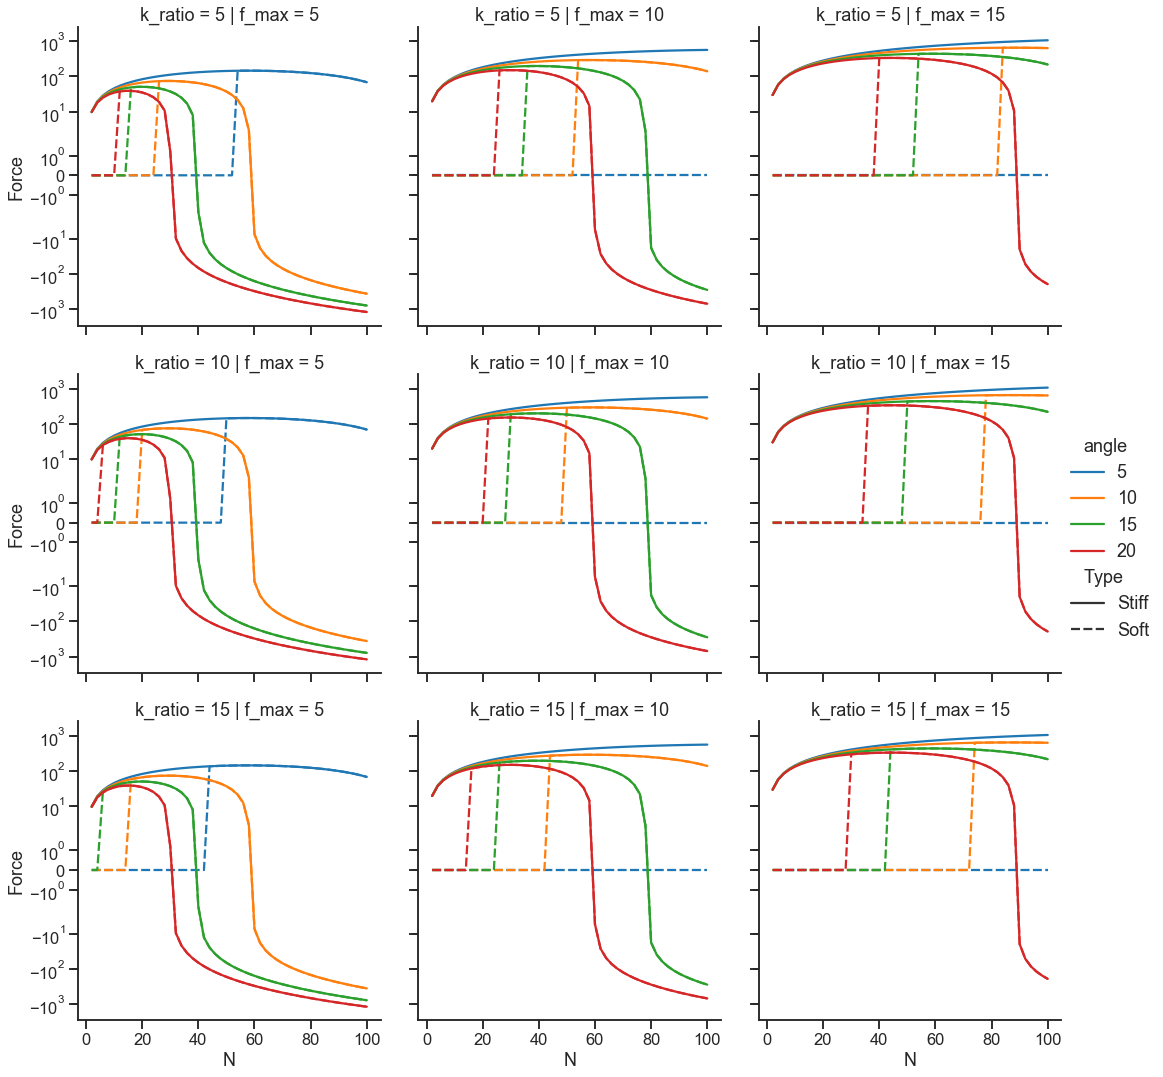

In [79]:
sns.set_context("talk")
sns.set_style("ticks")
pal = sns.color_palette()[:len(angle_list)]
g = sns.relplot(data=df, x = 'N', y = 'Force', hue = 'angle', style = 'Type',
                col = 'f_max', row = 'k_ratio', kind = 'line', palette = pal)
#symmetric log scale in y axis
for ax1 in g.axes:
    for ax2 in ax1:
        ax2.set_yscale('symlog')
plt.show()